In [1]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np
from statsmodels.stats import multicomp

## Infant Mortaility by Race

In [2]:
dfImrByCountyByRace = pd.read_csv("./IMR by county by race, 2007-2016.txt", sep='\t')
# dfImrByCountyByRace['Race'] = ["Unknown" if race is np.nan else race for race in dfImrByCountyByRace['Race']]

dfImrByCountyByRace.dropna(subset=['Death Rate'], inplace=True)


In [3]:
# remove rows with unreliable death rate data (fewer than 20 deaths)
dfImrByCountyByRace = dfImrByCountyByRace.loc[dfImrByCountyByRace['Death Rate'].map(lambda x: 'Unreliable' not in str(x))]
# dfImrByCountyByRace.loc[dfImrByCountyByRace['Race'] is np.nan]

# convert death rate to float
dfImrByCountyByRace['Death Rate'] = dfImrByCountyByRace['Death Rate'].map(lambda x: float(x))


In [4]:
blacks = dfImrByCountyByRace.loc[dfImrByCountyByRace['Race Code'] == '2054-5']['Death Rate']
natives = dfImrByCountyByRace.loc[dfImrByCountyByRace['Race Code'] == '1002-5']['Death Rate']
whites = dfImrByCountyByRace.loc[dfImrByCountyByRace['Race Code'] == '2106-3']['Death Rate']
asians = dfImrByCountyByRace.loc[dfImrByCountyByRace['Race Code'] == 'A-PI']['Death Rate']
unknown = dfImrByCountyByRace.loc[dfImrByCountyByRace['Race'] == 'Unknown']['Death Rate']


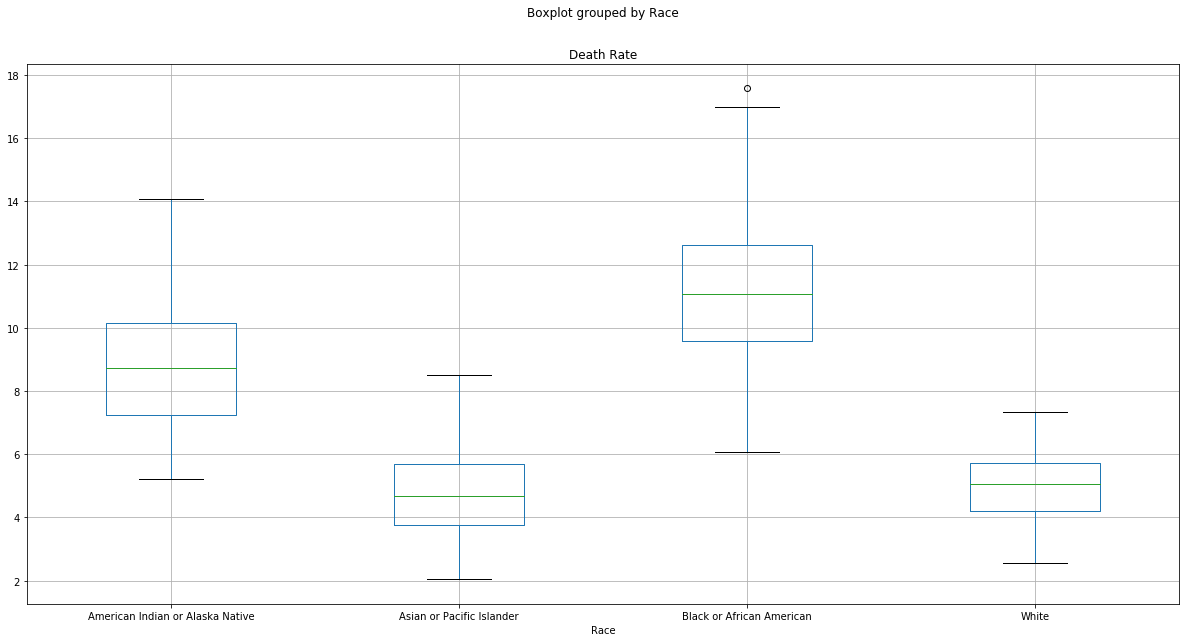

In [5]:
ax = dfImrByCountyByRace.boxplot('Death Rate', by="Race", figsize=(20, 10))
fig = ax.get_figure()
fig.savefig('Death Rate by Race.png')

### ANOVA shows that one (or more) race(s) is significantly different than the rest

In [6]:
stats.f_oneway(blacks, natives, whites, asians)

F_onewayResult(statistic=750.6014547203422, pvalue=4.2275575569554066e-222)

In [7]:
blacksByCounty = dfImrByCountyByRace.set_index(['Race', 'County']).sort_values(['Race', 'Death Rate'], ascending=False).loc['Black or African American']
blacksByCounty = blacksByCounty.loc[blacksByCounty['Death Rate'].notnull()]

In [8]:
blacksHighestImrCounties = blacksByCounty.head(10)
blacksHighestImrCounties.to_csv("./AfricanAmericanHighestImrCounties.csv")

In [9]:
blacksLowestImrCounties = blacksByCounty.tail(10)
blacksLowestImrCounties.to_csv("./AfricanAmericanLowestImrCounties.csv")

In [10]:
# use pairwise tukeyhsd to find out which race is significnalty different than the rest  
answer = multicomp.pairwise_tukeyhsd(dfImrByCountyByRace['Death Rate'], dfImrByCountyByRace['Race'], alpha=0.05)

In [11]:
# reject True proves the hypothesis - that there is significant difference between two means
print(answer)

                    Multiple Comparison of Means - Tukey HSD,FWER=0.05                    
             group1                        group2          meandiff  lower   upper  reject
------------------------------------------------------------------------------------------
American Indian or Alaska Native Asian or Pacific Islander -4.0327  -4.8902 -3.1751  True 
American Indian or Alaska Native Black or African American  2.3376   1.5157  3.1595  True 
American Indian or Alaska Native           White           -3.8264  -4.6396 -3.0131  True 
   Asian or Pacific Islander     Black or African American  6.3702   5.9138  6.8267  True 
   Asian or Pacific Islander               White            0.2063  -0.2344  0.647  False 
   Black or African American               White           -6.1639  -6.5305 -5.7973  True 
------------------------------------------------------------------------------------------


## Infant Mortality by Race, 2007-2016

In [12]:
dfImrByYearByRace = pd.read_csv("./imr by year by race, 2007-2016.txt", sep='\t')

In [13]:
dfImrByYearByRace.dropna(subset=['Year of Death'], inplace=True)
dfImrByYearByRace['Race'] = ['Unknown' if myrace is np.nan else myrace for myrace in dfImrByYearByRace['Race']]

In [14]:
dfImrByYearByRace.head()

,Notes,Year of Death,Year of Death Code,Race,Race Code,Deaths,Births,Death Rate
0,NaN,2007.0,2007.0,American Indian or Alaska Native,1002-5,456.0,49443.0,9.22
1,NaN,2007.0,2007.0,Asian or Pacific Islander,A-PI,1216.0,254488.0,4.78
2,NaN,2007.0,2007.0,Black or African American,2054-5,8732.0,675676.0,12.92
3,NaN,2007.0,2007.0,White,2106-3,18749.0,3336626.0,5.62
4,Total,2007.0,2007.0,Unknown,NaN,29153.0,4316233.0,6.75


In [15]:
dfPlot = dfImrByYearByRace.pivot('Year of Death', 'Race', 'Death Rate')
dfPlot.reset_index(inplace=True)


In [16]:
dfPlot.head()

Race,Year of Death,American Indian or Alaska Native,Asian or Pacific Islander,Black or African American,Unknown,White
0,2007.0,9.22,4.78,12.92,6.75,5.62
1,2008.0,8.42,4.51,12.37,6.61,5.56
2,2009.0,8.47,4.40,12.12,6.39,5.33
3,2010.0,8.28,4.27,11.21,6.14,5.21
4,2011.0,8.21,4.36,11.15,6.07,5.12


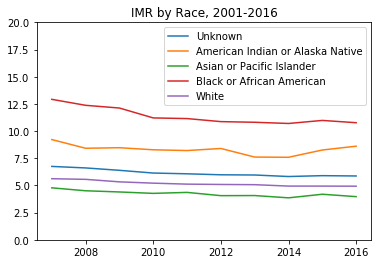

In [17]:
plt.plot(dfPlot['Year of Death'], dfPlot['Unknown'], label='Unknown')
plt.plot(dfPlot['Year of Death'], dfPlot['American Indian or Alaska Native'], label='American Indian or Alaska Native')
plt.plot(dfPlot['Year of Death'], dfPlot['Asian or Pacific Islander'], label='Asian or Pacific Islander')
plt.plot(dfPlot['Year of Death'], dfPlot['Black or African American'], label='Black or African American')
plt.plot(dfPlot['Year of Death'], dfPlot['White'], label='White')
plt.ylim(0, 20)
plt.legend()
plt.title ("IMR by Race, 2001-2016")
plt.savefig("IMR by Race, 2001-2016.png")
plt.show()

In [18]:
# TODO
# WHO rates by country


## Leading cause of infant mortality by age


In [19]:
# Death Rate by age
dfImrByAgeByCause = pd.read_csv("./IMR by age by cause, 2007-2016.txt", sep='\t')

# Convert NaN to Unknown for the age of infant
dfImrByAgeByCause['Age of Infant at Death'] = ["Unknown" if age is np.nan else age for age in dfImrByAgeByCause['Age of Infant at Death']]

# Remove rows with Unreliable in Death Rate column (fewer than 20 reported cases)
dfImrByAgeByCause = dfImrByAgeByCause.loc[dfImrByAgeByCause['Death Rate'].map(lambda x: 'Unreliable' not in str(x))]

# Convert Death Rate to float
dfImrByAgeByCause['Death Rate'] = dfImrByAgeByCause['Death Rate'].map(lambda x: float(x))

# Save totals in new df
dfTotalsbyAgebyCause = dfImrByAgeByCause.loc[(dfImrByAgeByCause['Notes']=='Total') & (dfImrByAgeByCause['Age of Infant at Death']!= 'Unknown')]

# Remove Totals and summary rows
dfImrByAgeByCause = dfImrByAgeByCause[(dfImrByAgeByCause['Notes']!="Total")& (dfImrByAgeByCause["Death Rate"].notnull())]

# Sort descending by Death Rate
dfImrByAgeByCause.sort_values(by='Death Rate', ascending=False, inplace=True)

dfImrByAgeByCause.head()


,Notes,Age of Infant at Death,Age of Infant at Death Code,Cause of death,Cause of death Code,Deaths,Births,Death Rate
701,NaN,1 - 23 hours,2.0,Extreme immaturity,P07.2,18147.0,40445070.0,0.45
3988,NaN,28 - 364 days,5.0,Sudden infant death syndrome - SIDS,R95,17167.0,40445070.0,0.42
163,NaN,Under 1 hour,1.0,Extreme immaturity,P07.2,10528.0,40445070.0,0.26
3990,NaN,28 - 364 days,5.0,Other ill-defined and unspecified causes of mo...,R99,8889.0,40445070.0,0.22
4071,NaN,28 - 364 days,5.0,Accidental suffocation and strangulation in bed,W75,6632.0,40445070.0,0.16


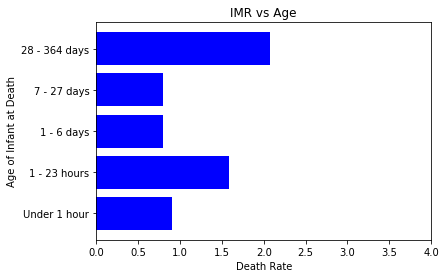

In [20]:
rects = plt.barh(dfTotalsbyAgebyCause['Age of Infant at Death'], width=dfTotalsbyAgebyCause['Death Rate'], color='blue')
plt.title("IMR vs Age")
plt.ylabel("Age of Infant at Death")
plt.xlabel("Death Rate")
plt.xlim(0, 4)
plt.savefig("IMR vs age.png")
plt.show()

In [21]:
# removes rows that show total
dfImrByAgeByCause = dfImrByAgeByCause.loc[(dfImrByAgeByCause['Notes'] != 'Total')].sort_values(by=['Death Rate'], ascending=False).head(20)

In [22]:
indexedImrByAgeByCause = dfImrByAgeByCause.set_index(["Age of Infant at Death", "Cause of death"])
indexedImrByAgeByCause.sort_values(["Age of Infant at Death Code", "Death Rate"], ascending=[True, False], inplace=True)
indexedImrByAgeByCause.head()

Notes  \
Age of Infant at Death Cause of death                                             
Under 1 hour           Extreme immaturity                                   NaN   
                       Other preterm infants                                NaN   
                       Newborn affected by premature rupture of membranes   NaN   
                       Newborn affected by incompetent cervix               NaN   
1 - 23 hours           Extreme immaturity                                   NaN   

                                                                           Age of Infant at Death Code  \
Age of Infant at Death Cause of death                                                                    
Under 1 hour           Extreme immaturity                                                          1.0   
                       Other preterm infants                                                       1.0   
                       Newborn affected by premature rupture of membranes                          1.0   
                       Newborn affected by incompetent cervix                                      1.0   
1 - 23 hours           Extreme immaturity                                                          2.0   

                                                                          Cause of death Code  \
Age of Infant at Death Cause of death                                                           
Under 1 hour           Extreme immaturity                                               P07.2   
                       Other preterm infants                                            P07.3   
                       Newborn affected by premature rupture of membranes               P01.1   
                       Newborn affected by incompetent cervix                           P01.0   
1 - 23 hours           Extreme immaturity                                               P07.2   

                                                                            Deaths  \
Age of Infant at Death Cause of death                                                
Under 1 hour           Extreme immaturity                                  10528.0   
                       Other preterm infants                                3615.0   
                       Newborn affected by premature rupture of membranes   3061.0   
                       Newborn affected by incompetent cervix               1834.0   
1 - 23 hours           Extreme immaturity                                  18147.0   

                                                                               Births  \
Age of Infant at Death Cause of death                                                   
Under 1 hour           Extreme immaturity                                  40445070.0   
                       Other preterm infants                               40445070.0   
                       Newborn affected by premature rupture of membranes  40445070.0   
                       Newborn affected by incompetent cervix              40445070.0   
1 - 23 hours           Extreme immaturity                                  40445070.0   

                                                                           Death Rate  
Age of Infant at Death Cause of death                                                  
Under 1 hour           Extreme immaturity                                        0.26  
                       Other preterm infants                                     0.09  
                       Newborn affected by premature rupture of membranes        0.08  
                       Newborn affected by incompetent cervix                    0.05  
1 - 23 hours           Extreme immaturity                                        0.45

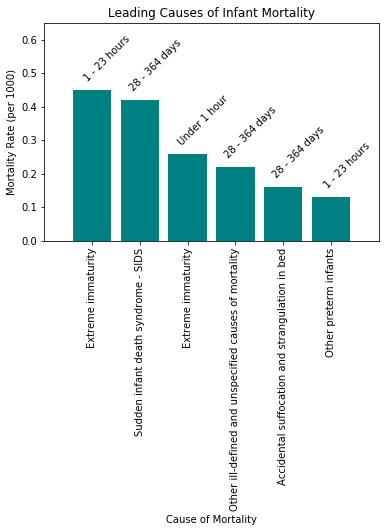

In [23]:
x_axis = dfImrByAgeByCause['Cause of death'].head(6)

y_axis = dfImrByAgeByCause['Death Rate'].head(6)
rects = plt.bar(range(len(x_axis)),y_axis, color='teal')
plt.xticks(range(len(x_axis)), x_axis, rotation='vertical')
plt.xlim(-1,6)
plt.ylim(0, 0.65)
for rect in rects:
    indx = rects.index(rect)
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/1.1, height + 0.02,
             dfImrByAgeByCause['Age of Infant at Death'].iloc[indx],
             ha='center', va='bottom', color='black', rotation = 45)
    
plt.xlabel("Cause of Mortality")
plt.ylabel("Mortality Rate (per 1000)")
plt.title("Leading Causes of Infant Mortality")

plt.savefig("Leading Causes of Infant Mortality.png")
plt.show()

## Leading cause of infant mortality by race


In [24]:
dfImrByRaceByCause = pd.read_csv("./imr by race by cause, 2007-2016.txt", sep='\t')

# remove Unreliable from Death Rate colum (fewer than 20 reported cases)

dfImrByRaceByCause = dfImrByRaceByCause.loc[dfImrByRaceByCause['Death Rate'].map(lambda x: 'Unreliable' not in str(x))]
# remove totals
dfImrByRaceByCause = dfImrByRaceByCause[(dfImrByRaceByCause['Notes']!='Total') & dfImrByRaceByCause['Death Rate'].notnull()]

# convert death rate to float
dfImrByRaceByCause['Death Rate'] = dfImrByRaceByCause['Death Rate'].map(lambda x: float(x))

# sort by race ascending, death rate descending
dfImrByRaceByCause = dfImrByRaceByCause.sort_values(['Race', 'Death Rate'], ascending=[True, False])

dfImrByRaceByCause.head()


,Notes,Race,Race Code,Cause of death,Cause of death Code,Deaths,Births,Death Rate
117,NaN,American Indian or Alaska Native,1002-5,Sudden infant death syndrome - SIDS,R95,48.0,43555.0,1.10
118,NaN,American Indian or Alaska Native,1002-5,Other ill-defined and unspecified causes of mo...,R99,39.0,43555.0,0.90
43,NaN,American Indian or Alaska Native,1002-5,Extreme immaturity,P07.2,31.0,43555.0,0.71
248,NaN,Asian or Pacific Islander,A-PI,Extreme immaturity,P07.2,171.0,302283.0,0.57
369,NaN,Asian or Pacific Islander,A-PI,Other ill-defined and unspecified causes of mo...,R99,50.0,302283.0,0.17


In [25]:
leadingCauseOfDeathByRace = pd.DataFrame()
for race in dfImrByRaceByCause['Race'].unique():
       leadingCauseOfDeathByRace = leadingCauseOfDeathByRace.append(dfImrByRaceByCause[dfImrByRaceByCause['Race'] == race][['Race', 'Cause of death', 'Death Rate']].head(1))

leadingCauseOfDeathByRace

secondLeadingCauseOfDeathByRace = pd.DataFrame()
for race in dfImrByRaceByCause['Race'].unique():
       secondLeadingCauseOfDeathByRace = secondLeadingCauseOfDeathByRace.append(dfImrByRaceByCause[dfImrByRaceByCause['Race'] == race][['Race', 'Cause of death', 'Death Rate']].head(2).tail(1))

secondLeadingCauseOfDeathByRace


thirdLeadingCauseOfDeathByRace = pd.DataFrame()
for race in dfImrByRaceByCause['Race'].unique():
       thirdLeadingCauseOfDeathByRace = thirdLeadingCauseOfDeathByRace.append(dfImrByRaceByCause[dfImrByRaceByCause['Race'] == race][['Race', 'Cause of death', 'Death Rate']].head(3).tail(1))

thirdLeadingCauseOfDeathByRace

fourthLeadingCauseOfDeathByRace = pd.DataFrame()
for race in dfImrByRaceByCause['Race'].unique():
       fourthLeadingCauseOfDeathByRace = fourthLeadingCauseOfDeathByRace.append(dfImrByRaceByCause[dfImrByRaceByCause['Race'] == race][['Race', 'Cause of death', 'Death Rate']].head(4).tail(1))



In [26]:
causes = x_axis.unique()
races = dfImrByRaceByCause['Race'].unique()

In [27]:
mylist = []
for cause in causes:
    for thisrace in races:
        if ((dfImrByRaceByCause['Cause of death'] == cause) & (dfImrByRaceByCause['Race'] == thisrace)).any():
            myrow = dfImrByRaceByCause.loc[(dfImrByRaceByCause['Cause of death'] == cause) & (dfImrByRaceByCause['Race'] == thisrace)]
            mylist.append({
                'Race': thisrace,
                'Cause of death': cause,
                'Death Rate' : myrow.iloc[0]['Death Rate']})
        else:
            mylist.append({
                'Race': thisrace,
                'Cause of death': cause,
                'Death Rate' : 0})

dfImrByRaceByCausePlotting = pd.DataFrame(mylist)

dfImrByRaceByCausePlotting = dfImrByRaceByCausePlotting.pivot(index='Race', columns='Cause of death', values='Death Rate')

dfImrByRaceByCausePlotting = dfImrByRaceByCausePlotting[[
 'Extreme immaturity',
 'Sudden infant death syndrome - SIDS',
 'Other ill-defined and unspecified causes of mortality',
 'Accidental suffocation and strangulation in bed',
 'Other preterm infants']]


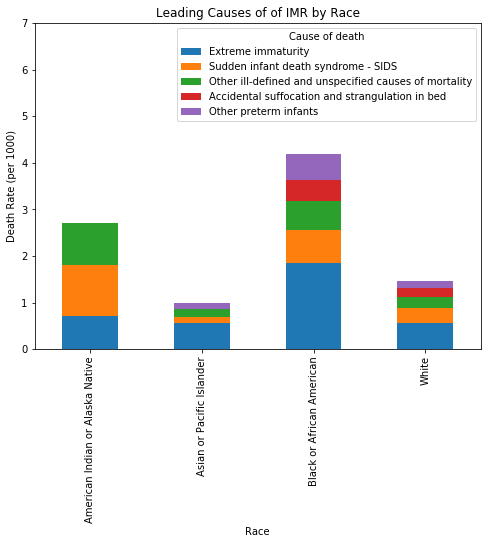

In [28]:
ax = dfImrByRaceByCausePlotting.plot.bar(stacked=True, ylim=(0,7), figsize=(8, 6), title="Leading Causes of of IMR by Race")
ax.set_ylabel("Death Rate (per 1000)")

fig = ax.get_figure()
fig.savefig('Leading Causes of IMR by Race.png')